In [1]:
import pandas as pd
import numpy as np
import algorithm
import os
import re

In [2]:
#pathname = r'D:/Jupyter Notebook code/source'
files = os.listdir()
txt_files = [file for file in files if re.match(r'.*\.txt$',file) ]
txt_files

['huanmai.txt']

In [3]:
# 读取原始数据文件
name = tuple(range(0,19))
for txt_file in txt_files:
    print(f"处理文件：{txt_file}")
    df = pd.read_csv(txt_file,sep = ' ',skiprows = 1,names = name)
    df.index = range(1, len(df) + 1)
    df.drop(18,axis = 1,inplace = True)
    print(df)

处理文件：huanmai.txt
       0   1   2   3    4   5   6     7    8   9    10  11   12  13   14  15  \
1      1F  10  32  A6  0.0  EC  04  55.0  0.0  AE  5.0  41  0.0  D5  5.0  E4   
2      1F  10  32  A6  0.0  F4  04  55.0  0.0  A4  5.0  41  0.0  CF  5.0  E4   
3      1F  10  32  A6  0.0  F7  04  55.0  0.0  A1  5.0  41  0.0  D3  5.0  E4   
4      1F  10  32  A6  0.0  F7  04  55.0  0.0  A5  5.0  41  0.0  D1  5.0  E4   
5      1F  10  32  A6  0.0  FD  04  55.0  0.0  9B  5.0  41  0.0  C5  5.0  E4   
...    ..  ..  ..  ..  ...  ..  ..   ...  ...  ..  ...  ..  ...  ..  ...  ..   
11237  1F  10  32  92  0.0  92  08  53.0  0.0  C9  6.0  4C  0.0  77  6.0  E4   
11238  1F  10  32  92  0.0  7A  08  53.0  0.0  D1  6.0  4C  0.0  7B  6.0  E4   
11239  1F  10  32  92  0.0  62  08  53.0  0.0  CA  6.0  4B  0.0  7B  6.0  E4   
11240  1F  10  32  92  0.0  49  08  53.0  0.0  C8  6.0  4B  0.0  7D  6.0  E4   
11241  1F  10  32  92  0.0  2A  08  53.0  0.0  C4  6.0  4B  0.0  7B  6.0  E4   

        16  17  
1    

In [4]:
df.drop(df.columns[:3], axis=1, inplace=True)
print(df)
df.columns

       3    4   5   6     7    8   9    10  11   12  13   14  15   16  17
1      A6  0.0  EC  04  55.0  0.0  AE  5.0  41  0.0  D5  5.0  E4  1.0  9E
2      A6  0.0  F4  04  55.0  0.0  A4  5.0  41  0.0  CF  5.0  E4  1.0  96
3      A6  0.0  F7  04  55.0  0.0  A1  5.0  41  0.0  D3  5.0  E4  1.0  9A
4      A6  0.0  F7  04  55.0  0.0  A5  5.0  41  0.0  D1  5.0  E4  1.0  9C
5      A6  0.0  FD  04  55.0  0.0  9B  5.0  41  0.0  C5  5.0  E4  1.0  8C
...    ..  ...  ..  ..   ...  ...  ..  ...  ..  ...  ..  ...  ..  ...  ..
11237  92  0.0  92  08  53.0  0.0  C9  6.0  4C  0.0  77  6.0  E4  1.0  FC
11238  92  0.0  7A  08  53.0  0.0  D1  6.0  4C  0.0  7B  6.0  E4  1.0  F0
11239  92  0.0  62  08  53.0  0.0  CA  6.0  4B  0.0  7B  6.0  E4  1.0  D0
11240  92  0.0  49  08  53.0  0.0  C8  6.0  4B  0.0  7D  6.0  E4  1.0  B7
11241  92  0.0  2A  08  53.0  0.0  C4  6.0  4B  0.0  7B  6.0  E4  1.0  92

[11241 rows x 15 columns]


Index([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [5]:
def is_valid_hex(hex_string):
    try:
        int(hex_string, 16)
        return True
    except ValueError:
        return False

def hex_to_decimal(hex_string):
    if isinstance(hex_string, str) and is_valid_hex(hex_string):  # 检查是否是字符串且是有效的十六进制字符串
        return int(hex_string, 16)
    else:
        return hex_string

df = df.applymap(hex_to_decimal)
print(df)


        3    4      5    6     7    8      9    10    11   12     13   14  \
1      166  0.0  236.0  4.0  55.0  0.0  174.0  5.0  65.0  0.0  213.0  5.0   
2      166  0.0  244.0  4.0  55.0  0.0  164.0  5.0  65.0  0.0  207.0  5.0   
3      166  0.0  247.0  4.0  55.0  0.0  161.0  5.0  65.0  0.0  211.0  5.0   
4      166  0.0  247.0  4.0  55.0  0.0  165.0  5.0  65.0  0.0  209.0  5.0   
5      166  0.0  253.0  4.0  55.0  0.0  155.0  5.0  65.0  0.0  197.0  5.0   
...    ...  ...    ...  ...   ...  ...    ...  ...   ...  ...    ...  ...   
11237  146  0.0  146.0  8.0  53.0  0.0  201.0  6.0  76.0  0.0  119.0  6.0   
11238  146  0.0  122.0  8.0  53.0  0.0  209.0  6.0  76.0  0.0  123.0  6.0   
11239  146  0.0   98.0  8.0  53.0  0.0  202.0  6.0  75.0  0.0  123.0  6.0   
11240  146  0.0   73.0  8.0  53.0  0.0  200.0  6.0  75.0  0.0  125.0  6.0   
11241  146  0.0   42.0  8.0  53.0  0.0  196.0  6.0  75.0  0.0  123.0  6.0   

          15   16     17  
1      228.0  1.0  158.0  
2      228.0  1.0  15

C:\Users\ly\AppData\Local\Temp\ipykernel_11408\1427900473.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(hex_to_decimal)


In [6]:
J1 = df.iloc[:,0]+df.iloc[:,1]*256
J2 = df.iloc[:,4]+df.iloc[:,5]*256
J3 = df.iloc[:,8]+df.iloc[:,9]*256
M1 = df.iloc[:,2]+df.iloc[:,3]*256
M2 = df.iloc[:,6]+df.iloc[:,7]*256
M3 = df.iloc[:,10]+df.iloc[:,11]*256
df['J1'] = J1
df['J2'] = J2
df['J3'] = J3
df['M1'] = M1
df['M2'] = M2
df['M3'] = M3
df['label'] = 3
print(df)
#df.to_csv('Out.csv', index=False)

         3    4      5    6     7    8      9   10    11   12  ...     15  \
1      166  0.0  236.0  4.0  55.0  0.0  174.0  5.0  65.0  0.0  ...  228.0   
2      166  0.0  244.0  4.0  55.0  0.0  164.0  5.0  65.0  0.0  ...  228.0   
3      166  0.0  247.0  4.0  55.0  0.0  161.0  5.0  65.0  0.0  ...  228.0   
4      166  0.0  247.0  4.0  55.0  0.0  165.0  5.0  65.0  0.0  ...  228.0   
5      166  0.0  253.0  4.0  55.0  0.0  155.0  5.0  65.0  0.0  ...  228.0   
...    ...  ...    ...  ...   ...  ...    ...  ...   ...  ...  ...    ...   
11237  146  0.0  146.0  8.0  53.0  0.0  201.0  6.0  76.0  0.0  ...  228.0   
11238  146  0.0  122.0  8.0  53.0  0.0  209.0  6.0  76.0  0.0  ...  228.0   
11239  146  0.0   98.0  8.0  53.0  0.0  202.0  6.0  75.0  0.0  ...  228.0   
11240  146  0.0   73.0  8.0  53.0  0.0  200.0  6.0  75.0  0.0  ...  228.0   
11241  146  0.0   42.0  8.0  53.0  0.0  196.0  6.0  75.0  0.0  ...  228.0   

        16     17     J1    J2    J3      M1      M2      M3  label  
1    

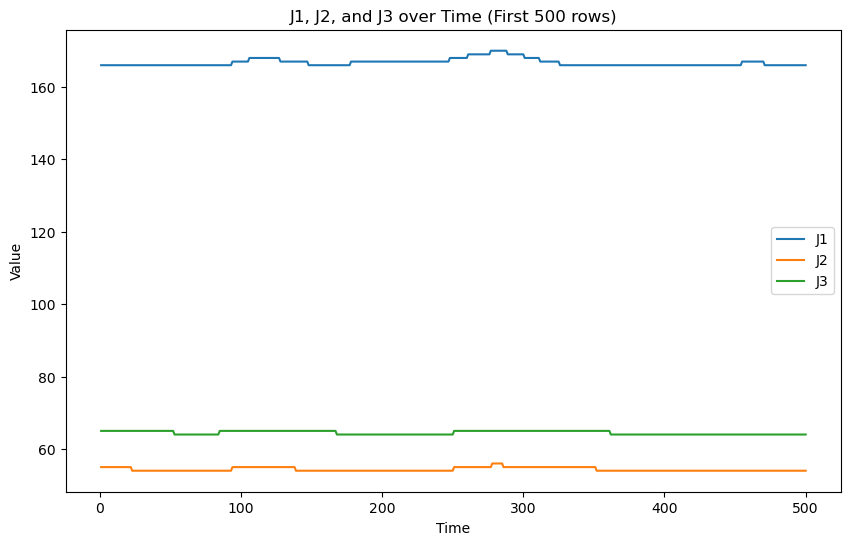

In [152]:

# 仅选择前500行数据
df_subset = df.iloc[:500, :]

# 画图
plt.figure(figsize=(10, 6))

# 绘制 M1 列
plt.plot(df_subset.index, df_subset['J1'], label='J1')

# 绘制 M2 列
plt.plot(df_subset.index, df_subset['J2'], label='J2')

# 绘制 M3 列
plt.plot(df_subset.index, df_subset['J3'], label='J3')

# 添加标题和标签
plt.title('J1, J2, and J3 over Time (First 500 rows)')
plt.xlabel('Time')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图形
plt.show()


In [37]:
def find_peek(data):
    # find one serials peeks
    amplitude = 0.6
    peek_list = []
    max_value = data.max()
    threshold = amplitude * max_value
    for i in range(2, len(data) - 2):
       # print(i)
        if data[i] > data[i + 1] and data[i] > data[i - 1] and data[i] > threshold:
            if len(peek_list) > 1:
                diff = i - peek_list[-1]
            else:
                diff = 101
            if diff < 100:
                old = data[peek_list[-1]]
                new = data[i]
                if old > new:
                    continue
                else:
                    peek_list.pop()
                    peek_list.append(i)
            else:
                peek_list.append(i)

    return peek_list
def find_data(arr, seq_length, size):
    result = []
    last = arr[0]
    result.append(last)
    for i in range(len(arr)):
        if arr[i] > last + seq_length:
            result.append(arr[i])
            if len(result) >= size:
                return result
    return result
def find_reverse_data(arr, seq_length, size,length):
    result = []
    index = -1
    last = arr[index]  # Start from the last element
    while last + seq_length >= length:
        index = index -1
        last = arr[index]
    for i in range(len(arr)+index, -1, -1):  # Iterate from the last index to the first
        if arr[i] < last - seq_length:  # Check if the current element is less than the previous element minus seq_length
            result.append(arr[i])
            if len(result) >= size:
                return result[::-1]  # Reverse the list and return
            last = arr[i]  # Update the last element
    return result[::-1]  # Reverse the list and return

            
  
M1_data = df['M1']
print(len(M1_data)) 
M1_peek = find_peek(M1_data)  
print(M1_peek)
train_index = find_data(M1_peek,200,10)
print(train_index)
test_index = find_reverse_data(M1_peek,200,10,len(M1_data))
print(test_index)

11241
[97, 99, 254, 631, 848, 1062, 1260, 1419, 1566, 1705, 1861, 2006, 2157, 2306, 2462, 2660, 2818, 3090, 3329, 3497, 3676, 3844, 4012, 4183, 4381, 4570, 4764, 4958, 5179, 5336, 5462, 5680, 5955, 6143, 6294, 6474, 6635, 6915, 7066, 7312, 7491, 7636, 7795, 7965, 8122, 8488, 8691, 8891, 9060, 9248, 9396, 9597, 9758, 9924, 10083, 10208, 10382, 10542, 10687, 10830, 11041, 11226]
[97, 631, 848, 1062, 1260, 1419, 1566, 1705, 1861, 2006]
[7795, 8122, 8488, 8691, 9060, 9396, 9597, 9924, 10208, 10542]


In [27]:
import pandas as pd
import numpy as np

# 读取原始数据
data = pd.read_csv('Out.csv')
# # 随机选择100个连续的500行作为样本



num_samples = 10
total_rows = len(data)
sample_size = 200
# 初始化新的DataFrame
new_data = pd.DataFrame()
#训练集
# 将每个样本的标签放在时间序列的最后一个时间点上，并组成新的DataFrame
for start_index in train_data:
    end_index = start_index + sample_size
    sample = data.iloc[start_index:end_index].copy()  # 使用 .copy() 创建切片的副本
    label = sample.iloc[-1]['label']  # 假设最后一列是标签列
    sample['label'] = label
    new_data = pd.concat([new_data, sample])
# 保存新的DataFrame到csv文件（追加模式）
new_data.to_csv('train_data.csv', mode='a', header=False, index=False)

#测试集
for start_index in test_data:
    end_index = start_index + sample_size
    sample = data.iloc[start_index:end_index].copy()  # 使用 .copy() 创建切片的副本
    label = sample.iloc[-1]['label']  # 假设最后一列是标签列
    sample['label'] = label
    new_data = pd.concat([new_data, sample])
# 保存新的DataFrame到csv文件（追加模式）
new_data.to_csv('test_data.csv', mode='a', header=False, index=False)


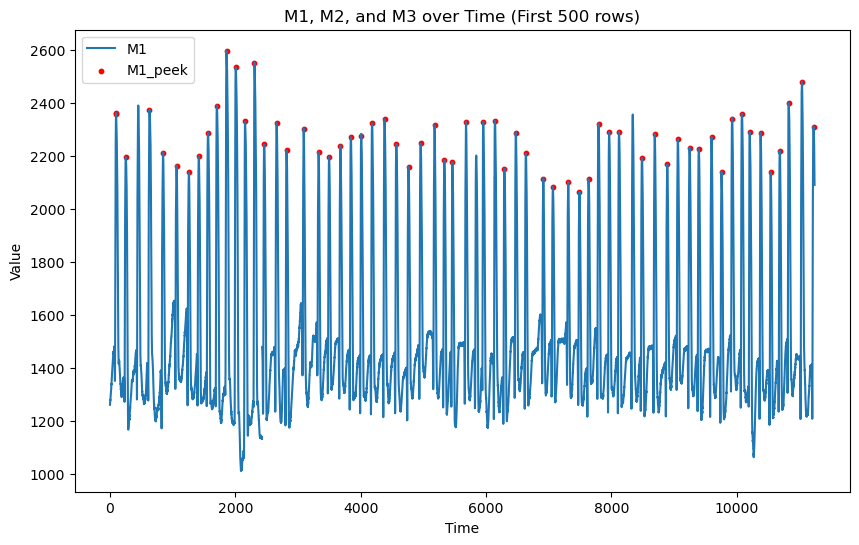

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设你有一个名为 df 的 DataFrame

# 仅选择前500行数据
df_subset = df.iloc[:, :]

# 画图
plt.figure(figsize=(10, 6))

# 绘制 M1 列
plt.plot(df_subset.index, df_subset['M1'], label='M1')
plt.scatter(M1_peek, [df_subset['M1'][i] for i in M1_peek], color='red', label='M1_peek',s = 10)
# 绘制 M2 列
plt.plot(df_subset.index, df_subset['M2'], label='M2')
plt.scatter(M2_peek, [df_subset['M2'][i] for i in M2_peek], color='blue', label='M2_peek',s = 10)
# 绘制 M3 列
plt.plot(df_subset.index, df_subset['M3'], label='M3')
plt.scatter(M3_peek, [df_subset['M3'][i] for i in M3_peek], color='yellow', label='M3_peek',s = 10)
# 添加标题和标签
plt.title('M1, M2, and M3 over Time (First 500 rows)')
plt.xlabel('Time')
plt.ylabel('Value')

# 添加图例
plt.legend()

# 显示图形
plt.show()
